In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from typing import List


In [4]:
def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

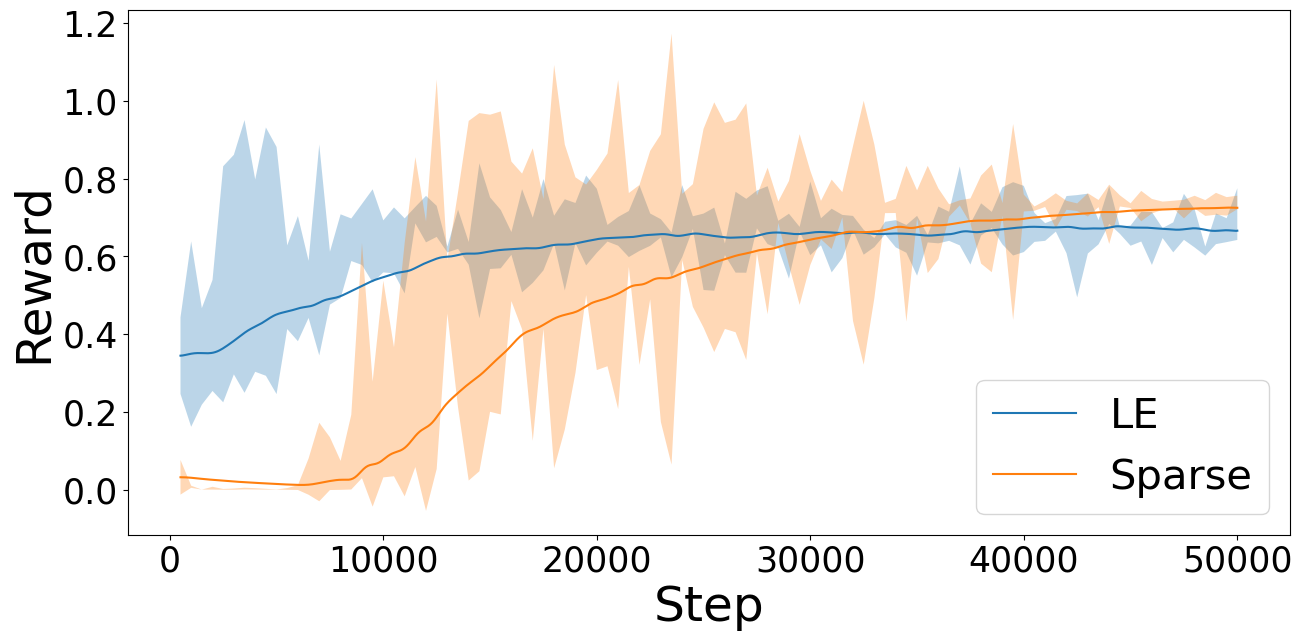

In [6]:
path1 = '/home/phu/Downloads/data_paper/Cartpole/le/run-SAC_10-tag-eval_mean_reward.csv'
path2 = '/home/phu/Downloads/data_paper/Cartpole/le/run-SAC_11-tag-eval_mean_reward.csv'
path3 = '/home/phu/Downloads/data_paper/Cartpole/le/run-SAC_12-tag-eval_mean_reward.csv'
path4 = '/home/phu/Downloads/data_paper/Cartpole/sparse/run-SAC_19-tag-eval_mean_reward.csv'
path5 = '/home/phu/Downloads/data_paper/Cartpole/sparse/run-SAC_20-tag-eval_mean_reward.csv'
path6 = '/home/phu/Downloads/data_paper/Cartpole/sparse/run-SAC_21-tag-eval_mean_reward.csv'

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

df1["value2"] = df2.Value
df1["value3"] = df3.Value
df1.Value = df1.Value/df1.Value.max()
df1.value2 = df1.value2/df1.value2.max()
df1.value3 = df1.value3/df1.value3.max()

df1['var'] = df1.drop(columns=["Step","Wall time"]).std(axis=1)
df1['mean'] = df1.drop(columns=["Step","Wall time"]).mean(axis=1)

x_new = np.linspace(df1.Step.min(), df1.Step.max(), 1000)
spl = make_interp_spline(df1.Step, df1['mean'], k=5)
y_new = spl(x_new)
y_new = smooth(y_new, 0.99)
df4 = pd.read_csv(path4)
df5 = pd.read_csv(path5)
df6 = pd.read_csv(path6)

df4["value2"] = df5.Value
df4["value3"] = df6.Value
df4.Value = df4.Value/df4.Value.max()
df4.value2 = df4.value2/df4.value2.max()
df4.value3 = df4.value3/df4.value3.max()

df4['var'] = df4.drop(columns=["Step","Wall time"]).std(axis=1)
df4['mean'] = df4.drop(columns=["Step","Wall time"]).mean(axis=1)

x_new_1 = np.linspace(df4.Step.min(), df4.Step.max(), 1000)
spl = make_interp_spline(df4.Step, df4['mean'], k=5)
y_new_1 = spl(x_new_1)
y_new_1 = smooth(y_new_1, 0.99)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211)
# ax.set_title('Cumulative reward', fontsize=35)
ax.set_xlabel('Step', fontsize=35)
ax.set_ylabel('Reward', fontsize=35)
y1 = ax.plot(x_new,y_new, label="LE")
# y2 = ax.plot(df2.Step,df2.Value/df2.Value.max(), label="LE-2")
# y3 =ax.plot(df3.Step,df3.Value/df3.Value.max(), label="LE-3")
y4 =ax.plot(x_new_1,y_new_1, label="Sparse")
font = {'size': 25}
ax.tick_params('x', labelsize=font['size'])
ax.tick_params('y', labelsize=font['size'])
plt.fill_between(df1.Step, df1['mean']-df1['var'], df1['mean']+df1['var'], alpha=0.3)
plt.fill_between(df4.Step, df4['mean']-df4['var'], df4['mean']+df4['var'], alpha=0.3)
plt.legend( loc='lower right', fontsize=30)
fig.savefig('thesis_plots/cartpole-sparsevsle.png', transparent=True, bbox_inches='tight')

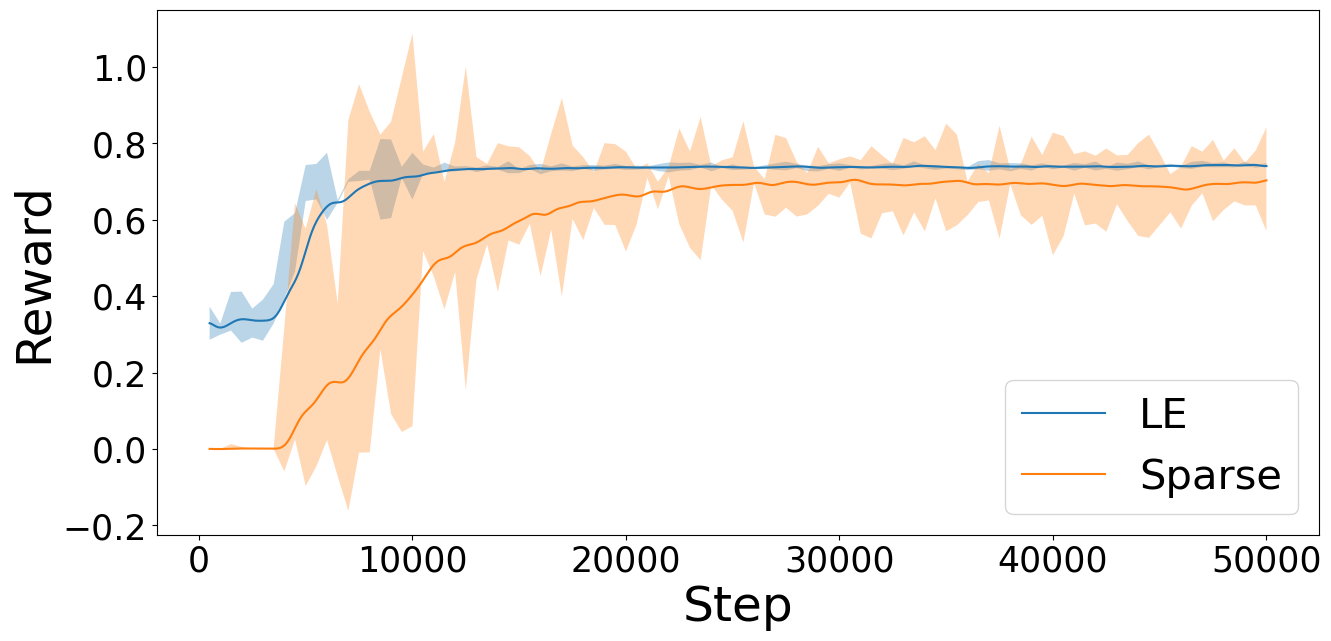

In [8]:
path1 = '/home/phu/Downloads/data_paper/Pendulum/le/run-SAC_3-tag-eval_mean_reward.csv'
path2 = '/home/phu/Downloads/data_paper/Pendulum/le/run-SAC_4-tag-eval_mean_reward.csv'
path3 = '/home/phu/Downloads/data_paper/Pendulum/le/run-SAC_5-tag-eval_mean_reward.csv'
path4 = '/home/phu/Downloads/data_paper/Pendulum/sparse/run-SAC_16-tag-eval_mean_reward.csv'
path5 = '/home/phu/Downloads/data_paper/Pendulum/sparse/run-SAC_17-tag-eval_mean_reward.csv'
path6 = '/home/phu/Downloads/data_paper/Pendulum/sparse/run-SAC_18-tag-eval_mean_reward.csv'

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
df1 = df1[0:100]
df2 = df2[0:100]
df3 = df3[0:100]

df1["value2"] = df2.Value
df1["value3"] = df3.Value
df1.Value = df1.Value/df1.Value.max()
df1.value2 = df1.value2/df1.value2.max()
df1.value3 = df1.value3/df1.value3.max()

df1['var'] = df1.drop(columns=["Step","Wall time"]).std(axis=1)
df1['mean'] = df1.drop(columns=["Step","Wall time"]).mean(axis=1)

df4 = pd.read_csv(path4)
df5 = pd.read_csv(path5)
df6 = pd.read_csv(path6)

df4["value2"] = df5.Value
df4["value3"] = df6.Value
df4.Value = df4.Value/df4.Value.max()
df4.value2 = df4.value2/df4.value2.max()
df4.value3 = df4.value3/df4.value3.max()

df4['var'] = df4.drop(columns=["Step","Wall time"]).std(axis=1)
df4['mean'] = df4.drop(columns=["Step","Wall time"]).mean(axis=1)


x_new = np.linspace(df1.Step.min(), df1.Step.max(), 1000)
spl = make_interp_spline(df1.Step, df1['mean'], k=5)
y_new = spl(x_new)
y_new = smooth(y_new, 0.95)

x_new_1 = np.linspace(df4.Step.min(), df4.Step.max(), 10000)
spl = make_interp_spline(df4.Step, df4['mean'], k=5)
y_new_1 = spl(x_new_1)
y_new_1 = smooth(y_new_1, 0.998)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211)
# ax.set_title('Cumulative reward', fontsize=35)
ax.set_xlabel('Step', fontsize=35)
ax.set_ylabel('Reward', fontsize=35)
y1 = ax.plot(x_new,y_new, label="LE")
# y2 = ax.plot(df2.Step,df2.Value/df2.Value.max(), label="LE-2")
# y3 =ax.plot(df3.Step,df3.Value/df3.Value.max(), label="LE-3")
y4 =ax.plot(x_new_1,y_new_1, label="Sparse")
font = {'size': 25}
ax.tick_params('x', labelsize=font['size'])
ax.tick_params('y', labelsize=font['size'])
plt.fill_between(df1.Step, df1['mean']-df1['var'], df1['mean']+df1['var'], alpha=0.3)
plt.fill_between(df4.Step, df4['mean']-df4['var'], df4['mean']+df4['var'], alpha=0.3)
plt.legend( loc='lower right', fontsize=30)
# fig.suptitle('Pendulum Maximal Lyapunov exponent vs. Sparse reward', fontsize=20)
fig.savefig('thesis_plots/pendulum-sparsevsle.png', transparent=True, bbox_inches='tight')

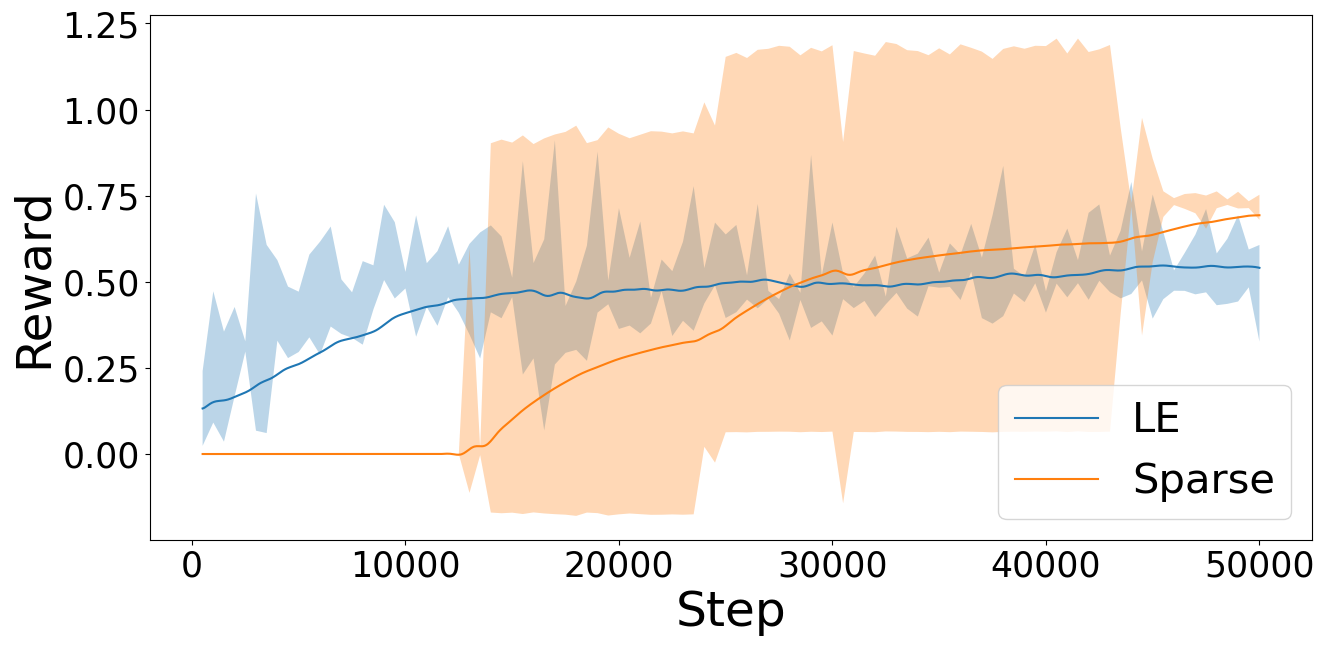

In [9]:
path1 = '/home/phu/Downloads/data_paper/Lorenz/le/run-SAC_21-tag-eval_mean_reward.csv'
path2 = '/home/phu/Downloads/data_paper/Lorenz/le/run-SAC_25-tag-eval_mean_reward.csv'
path3 = '/home/phu/Downloads/data_paper/Lorenz/le/run-SAC_26-tag-eval_mean_reward.csv'
path4 = '/home/phu/Downloads/data_paper/Lorenz/sparse/run-SAC_22-tag-eval_mean_reward.csv'
path5 = '/home/phu/Downloads/data_paper/Lorenz/sparse/run-SAC_23-tag-eval_mean_reward.csv'
path6 = '/home/phu/Downloads/data_paper/Lorenz/sparse/run-SAC_24-tag-eval_mean_reward.csv'

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

df1["value2"] = df2.Value
df1["value3"] = df3.Value
df1.Value = df1.Value/df1.Value.max()
df1.value2 = df1.value2/df1.value2.max()
df1.value3 = df1.value3/df1.value3.max()

df1['var'] = df1.drop(columns=["Step","Wall time"]).std(axis=1)
df1['mean'] = df1.drop(columns=["Step","Wall time"]).mean(axis=1)


df4 = pd.read_csv(path4)
df5 = pd.read_csv(path5)
df6 = pd.read_csv(path6)

df4["value2"] = df5.Value
df4["value3"] = df6.Value
df4.Value = df4.Value/df4.Value.max()
df4.value2 = df4.value2/df4.value2.max()
df4.value3 = df4.value3/df4.value3.max()

df4['var'] = df4.drop(columns=["Step","Wall time"]).std(axis=1)
df4['mean'] = df4.drop(columns=["Step","Wall time"]).mean(axis=1)

x_new = np.linspace(df1.Step.min(), df1.Step.max(), 1000)
spl = make_interp_spline(df1.Step, df1['mean'], k=5)
y_new = spl(x_new)
y_new = smooth(y_new, 0.99)

x_new_1 = np.linspace(df4.Step.min(), df4.Step.max(), 1000)
spl = make_interp_spline(df4.Step, df4['mean'], k=5)
y_new_1 = spl(x_new_1)
y_new_1 = smooth(y_new_1, 0.99)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211)
# ax.set_title('Cumulative reward', fontsize=35)
ax.set_xlabel('Step', fontsize=35)
ax.set_ylabel('Reward', fontsize=35)
y1 = ax.plot(x_new,y_new, label="LE")
# y2 = ax.plot(df2.Step,df2.Value/df2.Value.max(), label="LE-2")
# y3 =ax.plot(df3.Step,df3.Value/df3.Value.max(), label="LE-3")
y4 =ax.plot(x_new_1,y_new_1, label="Sparse")
font = {'size': 25}
ax.tick_params('x', labelsize=font['size'])
ax.tick_params('y', labelsize=font['size'])
plt.fill_between(df1.Step, df1['mean']-df1['var'], df1['mean']+df1['var'], alpha=0.3)
plt.fill_between(df4.Step, df4['mean']-df4['var'], df4['mean']+df4['var'], alpha=0.3)
plt.legend( loc='lower right', fontsize=30)
# fig.suptitle('Lorenz Maximal Lyapunov exponent vs. Sparse reward', fontsize=20)
fig.savefig('thesis_plots/lorenz-sparsevsle.png', transparent=True, bbox_inches='tight')

Text(0.5, 0.98, 'Pendulum Maximal Lyapunov exponent vs. Sparse reward vs. Sample LE')

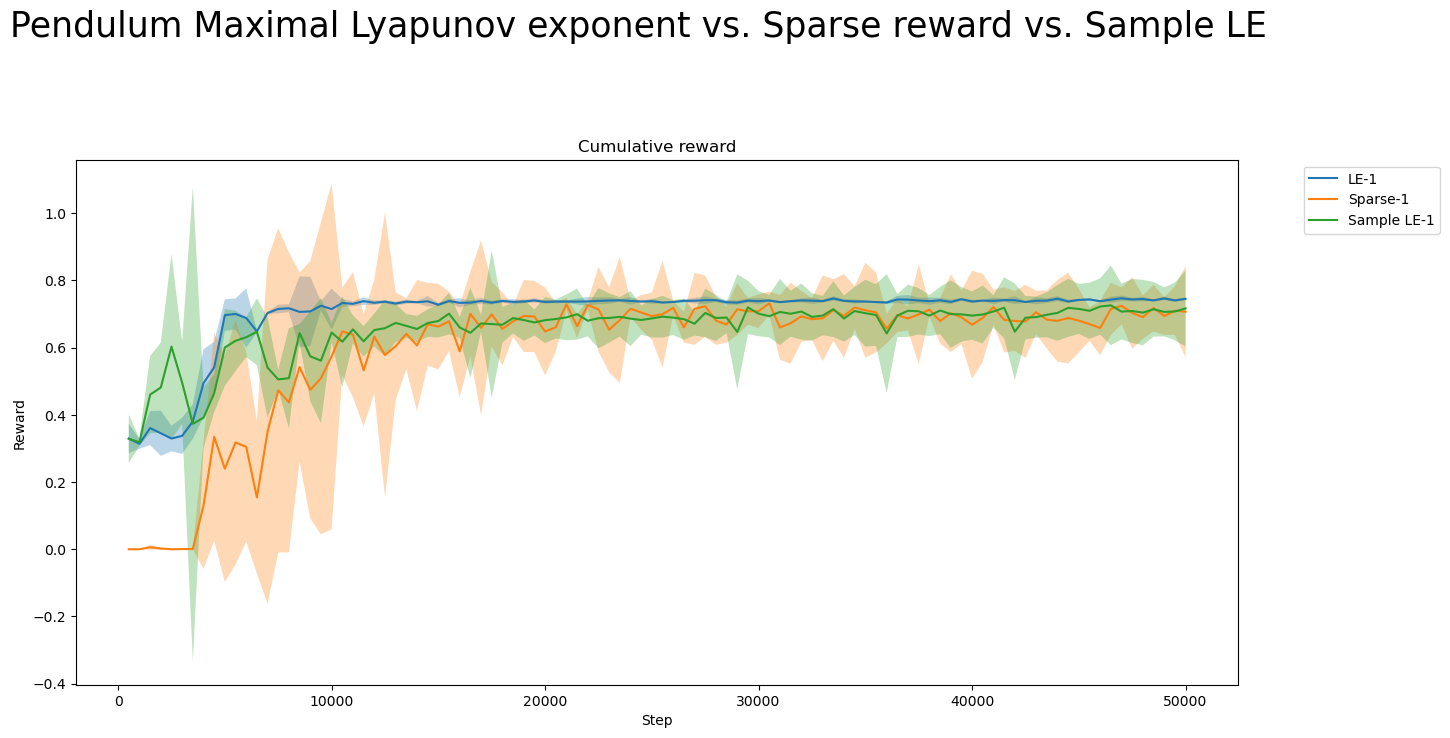

In [3]:
path1 = '/home/phu/Downloads/data_paper/Pendulum/le/run-SAC_3-tag-eval_mean_reward.csv'
path2 = '/home/phu/Downloads/data_paper/Pendulum/le/run-SAC_4-tag-eval_mean_reward.csv'
path3 = '/home/phu/Downloads/data_paper/Pendulum/le/run-SAC_5-tag-eval_mean_reward.csv'
path4 = '/home/phu/Downloads/data_paper/Pendulum/sparse/run-SAC_16-tag-eval_mean_reward.csv'
path5 = '/home/phu/Downloads/data_paper/Pendulum/sparse/run-SAC_17-tag-eval_mean_reward.csv'
path6 = '/home/phu/Downloads/data_paper/Pendulum/sparse/run-SAC_18-tag-eval_mean_reward.csv'
path7 = '/home/phu/Downloads/data_paper/Pendulum/sample_le/run-SAC_40-tag-eval_mean_reward.csv'
path8 = '/home/phu/Downloads/data_paper/Pendulum/sample_le/run-SAC_42-tag-eval_mean_reward.csv'
path9 = '/home/phu/Downloads/data_paper/Pendulum/sample_le/run-SAC_46-tag-eval_mean_reward.csv'

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
df1 = df1[0:100]
df2 = df2[0:100]
df3 = df3[0:100]

df1["value2"] = df2.Value
df1["value3"] = df3.Value
df1.Value = df1.Value/df1.Value.max()
df1.value2 = df1.value2/df1.value2.max()
df1.value3 = df1.value3/df1.value3.max()

df1['var'] = df1.drop(columns=["Step","Wall time"]).std(axis=1)
df1['mean'] = df1.drop(columns=["Step","Wall time"]).mean(axis=1)

df4 = pd.read_csv(path4)
df5 = pd.read_csv(path5)
df6 = pd.read_csv(path6)

df4["value2"] = df5.Value
df4["value3"] = df6.Value
df4.Value = df4.Value/df4.Value.max()
df4.value2 = df4.value2/df4.value2.max()
df4.value3 = df4.value3/df4.value3.max()

df4['var'] = df4.drop(columns=["Step","Wall time"]).std(axis=1)
df4['mean'] = df4.drop(columns=["Step","Wall time"]).mean(axis=1)

df7 = pd.read_csv(path7)
df8 = pd.read_csv(path8)
df9 = pd.read_csv(path9)
df7 = df7[0:100]
df8 = df8[0:100]
df9 = df9[0:100]

df7["value2"] = df8.Value
df7["value3"] = df9.Value
df7.Value = df7.Value/df7.Value.max()
df7.value2 = df7.value2/df7.value2.max()
df7.value3 = df7.value3/df7.value3.max()

df7['var'] = df7.drop(columns=["Step","Wall time"]).std(axis=1)
df7['mean'] = df7.drop(columns=["Step","Wall time"]).mean(axis=1)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211)
ax.set_title('Cumulative reward')
ax.set_xlabel('Step')
ax.set_ylabel('Reward')
y1 = ax.plot(df1.Step,df1['mean'], label="LE-1")
# y2 = ax.plot(df2.Step,df2.Value/df2.Value.max(), label="LE-2")
# y3 =ax.plot(df3.Step,df3.Value/df3.Value.max(), label="LE-3")
y4 =ax.plot(df4.Step,df4['mean'], label="Sparse-1")
y7 =ax.plot(df7.Step,df7['mean'], label="Sample LE-1")
# y5 =ax.plot(df5.Step,df5.Value/df5.Value.max(), label="Sparse-2")
# y6 =ax.plot(df6.Step,df6.Value/df6.Value.max(), label="Sparse-3")
plt.fill_between(df1.Step, df1['mean']-df1['var'], df1['mean']+df1['var'], alpha=0.3)
plt.fill_between(df4.Step, df4['mean']-df4['var'], df4['mean']+df4['var'], alpha=0.3)
plt.fill_between(df7.Step, df7['mean']-df7['var'], df7['mean']+df7['var'], alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.suptitle('Pendulum Maximal Lyapunov exponent vs. Sparse reward vs. Sample LE', fontsize=25)

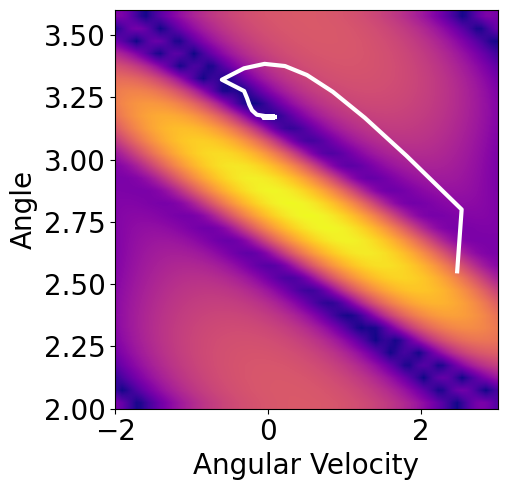

In [108]:
x=np.load("precal_pendulum_points_02.npy")
zs = np.loadtxt("precal_pendulum_02.txt", delimiter=',')
tjt=np.load("pendulum_trajectory.npy")

T = 500
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

plot1 = ax.imshow(np.flip(zs.reshape(32,80),1), extent=[-2,3, 2 , 3.6],aspect='auto',cmap='plasma',interpolation="bilinear")
ax.plot(tjt[1][1::],tjt[0][1::],linewidth=3, c='white')
# cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
font = {'size': 20}
ax.tick_params('x', labelsize=font['size'])
ax.tick_params('y', labelsize=font['size'])
ax.set_xlabel('Angular Velocity', fontsize = 20)
ax.set_ylabel('Angle', fontsize = 20)
# plt.title ('Simple Pendulum trajectory stablization', fontsize = 15)
fig.tight_layout()
fig.savefig('pendulum-trajectory.png', transparent=True)

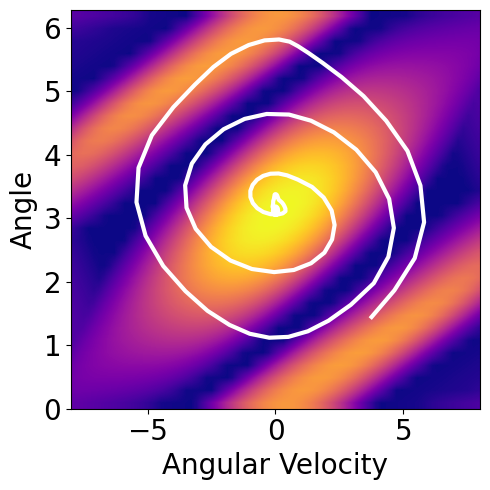

In [448]:
x=np.load("points_02.npy")
zs = np.loadtxt("precal_le_02.txt", delimiter=',')
tjt=np.load("cartpole_trajectory.npy")
T = 500
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

plot1 = ax.imshow(zs.reshape(80, 32, 20, 10)[:,:,0,0].T, extent=[-8,8, 0 , 2*np.pi],aspect='auto',cmap='plasma',interpolation="bilinear")
ax.plot(tjt[1][1::],tjt[0][1::],linewidth=3, c='white')
# cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
font = {'size': 20}
ax.tick_params('x', labelsize=font['size'])
ax.tick_params('y', labelsize=font['size'])
ax.set_xlabel('Angular Velocity', fontsize=20)
ax.set_ylabel('Angle', fontsize=20)
# plt.title ('Cartpole trajectory stablization', fontsize = 15)
fig.tight_layout()
fig.savefig('cartpole-trajectory.png', transparent=True)

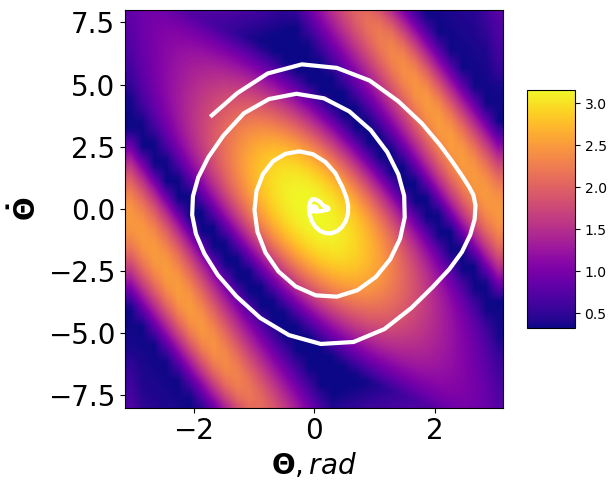

In [10]:
x=np.load("points_02.npy")
zs = np.loadtxt("precal_le_02.txt", delimiter=',')
tjt=np.load("cartpole_trajectory.npy")
tjt[0] = tjt[0]-np.pi
T = 500
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
l = zs.reshape(80, 32, 20, 10)[:,:,0,0]
plot1 = ax.imshow(np.flip(l,1), extent=[-np.pi , np.pi,-8,8],cmap='plasma',aspect='auto',interpolation="bilinear")
ax.plot(tjt[0][1::], tjt[1][1::],linewidth=3, c='white')
cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
font = {'size': 20}
ax.tick_params('x', labelsize=font['size'])
ax.tick_params('y', labelsize=font['size'])
ax.set_ylabel(r"$\mathbf{\dot{\Theta}}$", fontsize=20)
ax.set_xlabel(r"$\mathbf{\Theta},rad$", fontsize=20)
# plt.title ('Cartpole trajectory stablization', fontsize = 15)
fig.tight_layout()
fig.savefig('cartpole-trajectory.png', transparent=True)

In [4]:
tjt.shape

(2, 201)

ValueError: cannot reshape array of size 84 into shape (20,20)

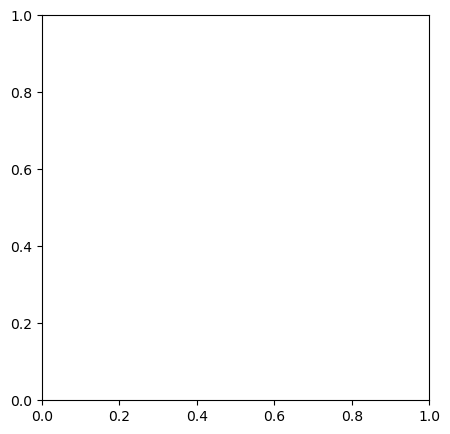

In [57]:
zs1 = np.load("lorenz_le.npy")
tjt=np.load("lorenz_trajectory.npy")

zs = zs1[zs1>0]
T = 500
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

plot1 = ax.imshow(zs[0:400].reshape(20, 20), extent=[-5,5, -5 , 5],aspect='auto',cmap='plasma',interpolation="bilinear")
ax.plot(tjt[1][0:3],tjt[0][0:3],linewidth=3, c='white')
# cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
font = {'size': 20}
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.tick_params('x', labelsize=font['size'])
ax.tick_params('y', labelsize=font['size'])
# plt.title ('Lorenz trajectory trajectory stablization', fontsize = 15)
fig.tight_layout()
fig.savefig('lorenz-trajectory.png', transparent=True)

In [54]:
zs

array([[ 1.47541432e-02, -1.43160371e-01, -1.01774980e+01],
       [ 7.87960380e-02, -2.41444569e-02, -1.01000776e+01],
       [ 9.59786858e-02, -8.99552256e-02, -9.59895376e+00],
       ...,
       [-2.54576417e-02,  1.02019600e-01, -1.70060372e+01],
       [-5.93716223e-02,  7.10103894e-02, -1.61995541e+01],
       [-8.68170080e-02, -5.09241627e-02, -1.55070160e+01]])

Text(0.5, 1.0, 'le of double pendulum, at T=500, +- 0.1 around fp1')

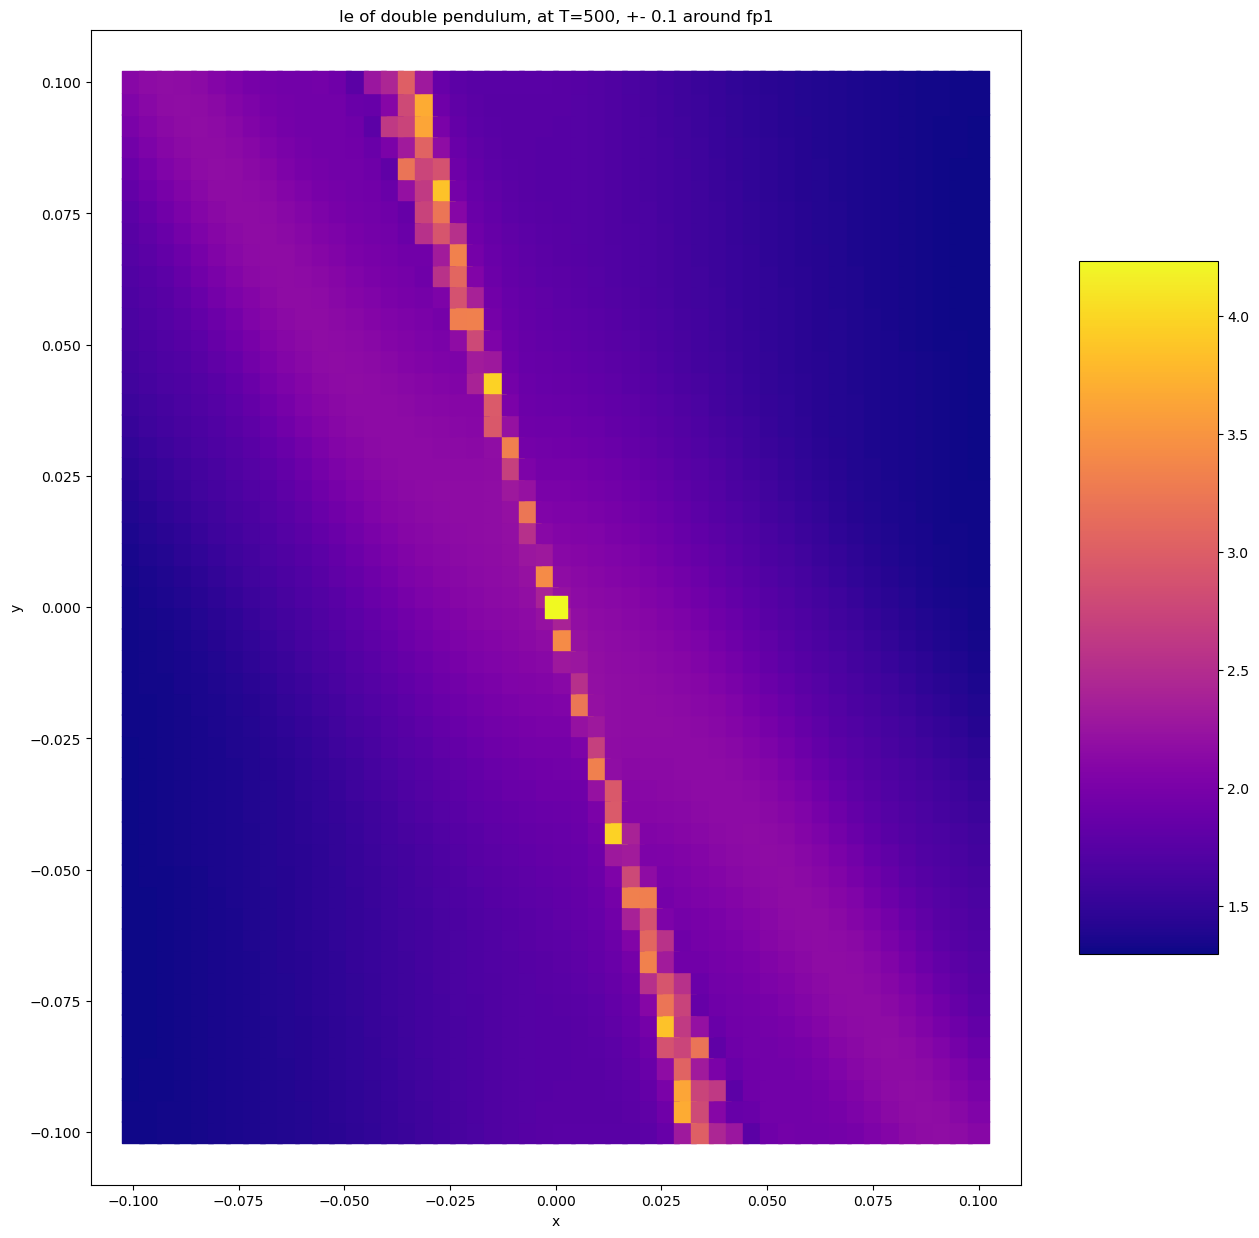

In [15]:
zs = np.load('/home/phu/Downloads/precal_dp_8_includetop.npy')
X_reshaped = np.load('/home/phu/Downloads/precal_dp_points_8_includetop.npy')

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

plot1 = ax.scatter(X_reshaped.T[2], X_reshaped.T[3],c=zs[:,0], cmap=plt.cm.plasma, s=250, marker="s")

cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
# ax.scatter( fp1[0], fp1[1], s=100, c='green', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title ('le of double pendulum, at T=500, +- 0.1 around fp1')

In [28]:
len(X_reshaped.T[2])

8001

Text(0.5, 1.0, 'le of double pendulum, at T=500, +- 0.1 around fp1')

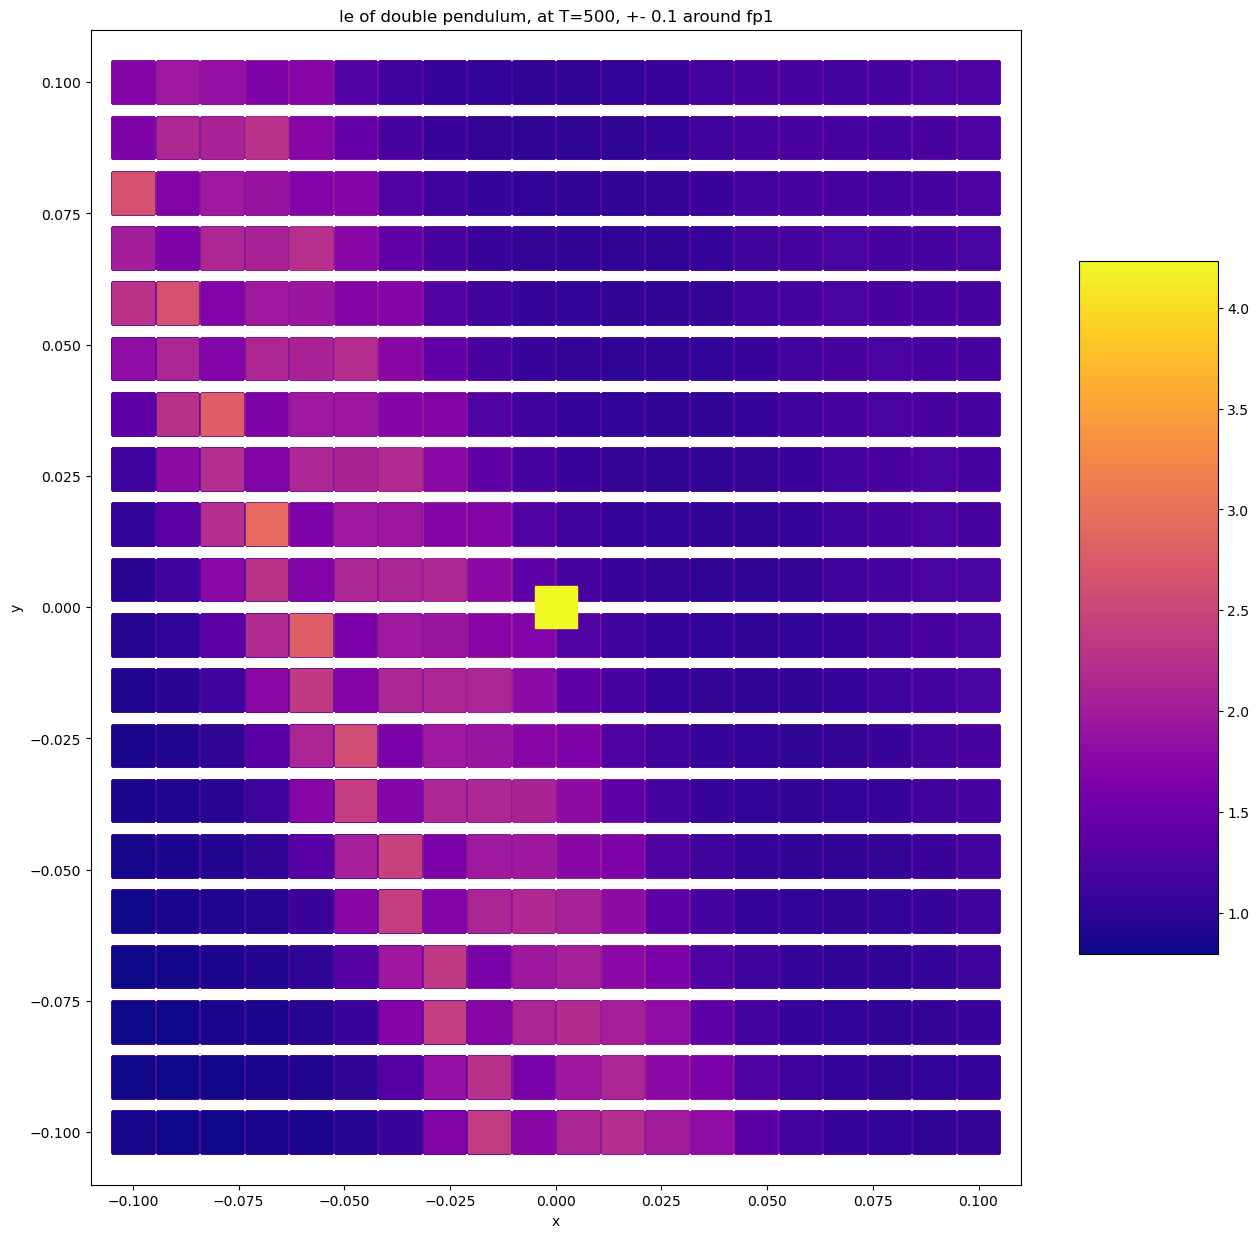

In [14]:
zs = np.load('/home/phu/Downloads/precal_dp_9.npy')
X_reshaped = np.load('/home/phu/Downloads/precal_dp_points_9.npy')

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

plot1 = ax.scatter(X_reshaped.T[2], X_reshaped.T[3],c=zs[:,0], cmap=plt.cm.plasma, s=900, marker="s")

cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
# ax.scatter( fp1[0], fp1[1], s=100, c='green', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title ('le of double pendulum, at T=500, +- 0.1 around fp1')

Text(0.5, 1.0, 'le of double pendulum, at T=500, +- 0.1 around fp1')

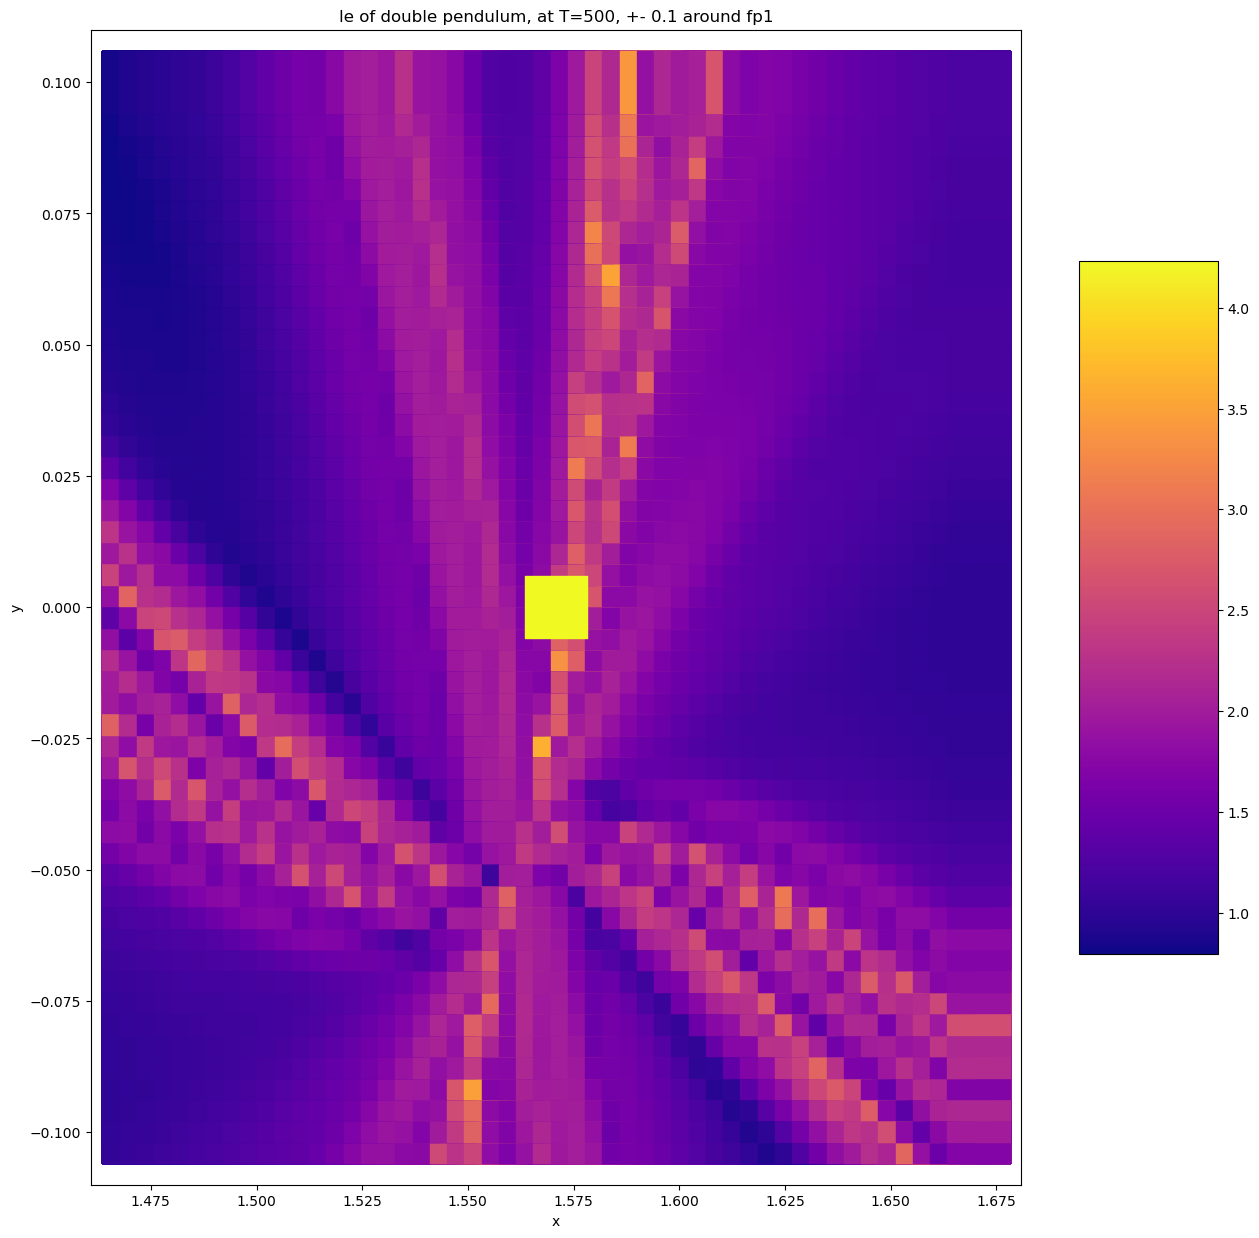

In [236]:
zs = np.load('/home/phu/Downloads/precal_dp_10.npy')
X_reshaped = np.load('/home/phu/Downloads/precal_dp_points_10.npy')
# tjt=np.load("/home/phu/Downloads/double_pendulum_trajectory2.npy")


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

plot1 = ax.scatter(X_reshaped.T[0], X_reshaped.T[2],c=zs[:,0], cmap=plt.cm.plasma, s=2000, marker="s")
# ax.plot(tjt[0],tjt[2],linewidth=3, c='yellow')
cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
# ax.scatter( fp1[0], fp1[1], s=100, c='green', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title ('le of double pendulum, at T=500, +- 0.1 around fp1')

In [237]:
X_reshaped

array([[ 1.47079633,  0.        , -0.1       , -0.1       ],
       [ 1.47487796,  0.        , -0.1       , -0.1       ],
       [ 1.47895959,  0.        , -0.1       , -0.1       ],
       ...,
       [ 1.66671469,  0.        ,  0.1       ,  0.1       ],
       [ 1.67079633,  0.        ,  0.1       ,  0.1       ],
       [ 1.57079633,  0.        ,  0.        ,  0.        ]])

In [5]:
X_reshaped[np.argmax(zs[:,0])]

array([ 1.57079633,  0.        ,  0.1010101 , -0.46464646])

In [8]:
for i in X_reshaped:
    print (i)

[ 1.57079633  0.         -2.         -2.        ]
[ 1.57079633  0.         -1.95959596 -2.        ]
[ 1.57079633  0.         -1.91919192 -2.        ]
[ 1.57079633  0.         -1.87878788 -2.        ]
[ 1.57079633  0.         -1.83838384 -2.        ]
[ 1.57079633  0.         -1.7979798  -2.        ]
[ 1.57079633  0.         -1.75757576 -2.        ]
[ 1.57079633  0.         -1.71717172 -2.        ]
[ 1.57079633  0.         -1.67676768 -2.        ]
[ 1.57079633  0.         -1.63636364 -2.        ]
[ 1.57079633  0.         -1.5959596  -2.        ]
[ 1.57079633  0.         -1.55555556 -2.        ]
[ 1.57079633  0.         -1.51515152 -2.        ]
[ 1.57079633  0.         -1.47474747 -2.        ]
[ 1.57079633  0.         -1.43434343 -2.        ]
[ 1.57079633  0.         -1.39393939 -2.        ]
[ 1.57079633  0.         -1.35353535 -2.        ]
[ 1.57079633  0.         -1.31313131 -2.        ]
[ 1.57079633  0.         -1.27272727 -2.        ]
[ 1.57079633  0.         -1.23232323 -2.        ]


[ 1.57079633  0.         -1.91919192 -0.70707071]
[ 1.57079633  0.         -1.87878788 -0.70707071]
[ 1.57079633  0.         -1.83838384 -0.70707071]
[ 1.57079633  0.         -1.7979798  -0.70707071]
[ 1.57079633  0.         -1.75757576 -0.70707071]
[ 1.57079633  0.         -1.71717172 -0.70707071]
[ 1.57079633  0.         -1.67676768 -0.70707071]
[ 1.57079633  0.         -1.63636364 -0.70707071]
[ 1.57079633  0.         -1.5959596  -0.70707071]
[ 1.57079633  0.         -1.55555556 -0.70707071]
[ 1.57079633  0.         -1.51515152 -0.70707071]
[ 1.57079633  0.         -1.47474747 -0.70707071]
[ 1.57079633  0.         -1.43434343 -0.70707071]
[ 1.57079633  0.         -1.39393939 -0.70707071]
[ 1.57079633  0.         -1.35353535 -0.70707071]
[ 1.57079633  0.         -1.31313131 -0.70707071]
[ 1.57079633  0.         -1.27272727 -0.70707071]
[ 1.57079633  0.         -1.23232323 -0.70707071]
[ 1.57079633  0.         -1.19191919 -0.70707071]
[ 1.57079633  0.         -1.15151515 -0.70707071]


[1.57079633 0.         0.58585859 0.54545455]
[1.57079633 0.         0.62626263 0.54545455]
[1.57079633 0.         0.66666667 0.54545455]
[1.57079633 0.         0.70707071 0.54545455]
[1.57079633 0.         0.74747475 0.54545455]
[1.57079633 0.         0.78787879 0.54545455]
[1.57079633 0.         0.82828283 0.54545455]
[1.57079633 0.         0.86868687 0.54545455]
[1.57079633 0.         0.90909091 0.54545455]
[1.57079633 0.         0.94949495 0.54545455]
[1.57079633 0.         0.98989899 0.54545455]
[1.57079633 0.         1.03030303 0.54545455]
[1.57079633 0.         1.07070707 0.54545455]
[1.57079633 0.         1.11111111 0.54545455]
[1.57079633 0.         1.15151515 0.54545455]
[1.57079633 0.         1.19191919 0.54545455]
[1.57079633 0.         1.23232323 0.54545455]
[1.57079633 0.         1.27272727 0.54545455]
[1.57079633 0.         1.31313131 0.54545455]
[1.57079633 0.         1.35353535 0.54545455]
[1.57079633 0.         1.39393939 0.54545455]
[1.57079633 0.         1.43434343 

[1.57079633 0.         0.22222222 1.87878788]
[1.57079633 0.         0.26262626 1.87878788]
[1.57079633 0.         0.3030303  1.87878788]
[1.57079633 0.         0.34343434 1.87878788]
[1.57079633 0.         0.38383838 1.87878788]
[1.57079633 0.         0.42424242 1.87878788]
[1.57079633 0.         0.46464646 1.87878788]
[1.57079633 0.         0.50505051 1.87878788]
[1.57079633 0.         0.54545455 1.87878788]
[1.57079633 0.         0.58585859 1.87878788]
[1.57079633 0.         0.62626263 1.87878788]
[1.57079633 0.         0.66666667 1.87878788]
[1.57079633 0.         0.70707071 1.87878788]
[1.57079633 0.         0.74747475 1.87878788]
[1.57079633 0.         0.78787879 1.87878788]
[1.57079633 0.         0.82828283 1.87878788]
[1.57079633 0.         0.86868687 1.87878788]
[1.57079633 0.         0.90909091 1.87878788]
[1.57079633 0.         0.94949495 1.87878788]
[1.57079633 0.         0.98989899 1.87878788]
[1.57079633 0.         1.03030303 1.87878788]
[1.57079633 0.         1.07070707 

In [16]:
tjt=np.load("/home/phu/Downloads/double_pendulum_trajectory.npy")

In [17]:
tjt

array([[ 1.65920160e+00,  1.65889758e+00,  1.65864507e+00,
         1.65846400e+00,  1.65835173e+00,  1.65830489e+00,
         1.65831993e+00,  1.65839381e+00,  1.65852395e+00,
         1.65870814e+00,  1.65894461e+00,  1.65923204e+00,
         1.65957007e+00,  1.65995900e+00,  1.66039923e+00,
         1.66089131e+00,  1.66143588e+00,  1.66203361e+00,
         1.66268518e+00,  1.66339129e+00,  1.66415270e+00,
         1.66497019e+00,  1.66584462e+00,  1.66677694e+00,
         1.66776807e+00,  1.66879809e+00,  1.66982857e+00,
         1.67085952e+00,  1.67189093e+00,  1.67292282e+00,
         1.67395526e+00,  1.67498826e+00,  1.67602182e+00,
         1.67705596e+00,  1.67809068e+00,  1.67912605e+00,
         1.68016222e+00,  1.68119921e+00,  1.68223704e+00,
         1.68327573e+00,  1.68431528e+00,  1.68535570e+00,
         1.68639701e+00,  1.68743893e+00,  1.68848132e+00,
         1.68952419e+00,  1.69056753e+00,  1.69161134e+00,
         1.69265563e+00,  1.69370038e+00,  1.69474561e+0

In [183]:
zs = np.load('/home/phu/Downloads/precal_rossler_4.npy')

In [184]:
zs.shape

(1030301, 3)

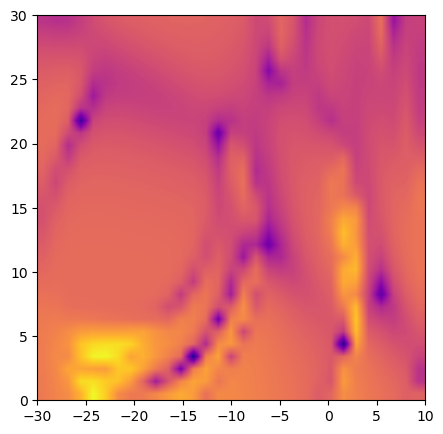

In [53]:
zs = np.load('/home/phu/Downloads/precal_rossler_1_001_1000.npy')
X_reshaped = np.load('/home/phu/Downloads/precal_rossler_points_1_001_1000.npy')
# tjt=np.load("/home/phu/Downloads/double_pendulum_trajectory2.npy")

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
l1 = np.flip(zs[:,0].reshape(31, 31, 31)[15,:,:])
ax1.imshow(l1,cmap='plasma', extent=[-30, 10 , 0,30],aspect='auto',interpolation="bilinear")
# ax1.scatter()

In [46]:
X_reshaped[np.argmax(zs[0])]

array([  7.9969991 , -68.64666066,  64.64666066])

In [49]:
dyn_rossler = {"a": 0.15, "b": 0.2, "c": 10 }

fp1 = np.array([(dyn_rossler['c'] + np.sqrt(dyn_rossler['c']**2 - 4*dyn_rossler['a']*dyn_rossler['b']))/2,
               (- dyn_rossler['c'] - np.sqrt(dyn_rossler['c']**2 - 4*dyn_rossler['a']*dyn_rossler['b']))/(2*dyn_rossler['a']),
               (dyn_rossler['c'] + np.sqrt(dyn_rossler['c']**2 - 4*dyn_rossler['a']*dyn_rossler['b']))/(2*dyn_rossler['a'])])
fp2 = np.array([(dyn_rossler['c'] - np.sqrt(dyn_rossler['c']**2 - 4*dyn_rossler['a']*dyn_rossler['b']))/2,
               (- dyn_rossler['c'] + np.sqrt(dyn_rossler['c']**2 - 4*dyn_rossler['a']*dyn_rossler['b']))/(2*dyn_rossler['a']),
               (dyn_rossler['c'] - np.sqrt(dyn_rossler['c']**2 - 4*dyn_rossler['a']*dyn_rossler['b']))/(2*dyn_rossler['a'])])


In [50]:
fp2

array([ 0.0030009, -0.020006 ,  0.020006 ])

In [167]:
l1 = zs[:,0].reshape(101, 101, 101)
np.where(l1 == 27.933701674309216)

(array([0]), array([50]), array([50]))

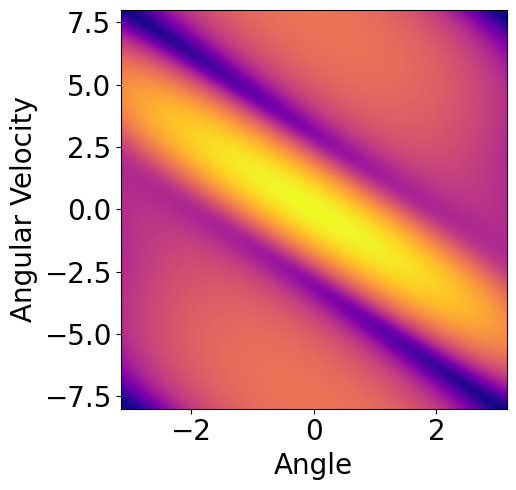

In [148]:
zs = np.load("/home/phu/Downloads/precal_pendulum_2.npy")
X_reshaped = np.load('/home/phu/Downloads/precal_pendulum_points_2.npy')
tjt=np.load("pendulum_trajectory.npy")

T = 500
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

plot1 = ax.imshow(np.flip(zs[:,0].reshape(101,101),1), extent=[-np.pi, np.pi , -8,8],aspect='auto',cmap='plasma',interpolation="bilinear")
# ax.plot(tjt[1][1::],tjt[0][1::],linewidth=3, c='white')
# cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
font = {'size': 20}
ax.tick_params('x', labelsize=font['size'])
ax.tick_params('y', labelsize=font['size'])
ax.set_ylabel('Angular Velocity', fontsize = 20)
ax.set_xlabel('Angle', fontsize = 20)
# plt.title ('Simple Pendulum trajectory stablization', fontsize = 15)
fig.tight_layout()
fig.savefig('pendulum-trajectory.png', transparent=True)

In [129]:
np.argmax(zs[:,0])

5100

In [131]:
X_reshaped[5100]

array([3.14159265, 0.        ])

In [130]:
zs[:,0][np.argmax(zs[:,0])]

4.6530456472360715

In [120]:
lx = np.linspace(np.pi -2, np.pi +2, 101)
ly = np.linspace(0 -2, 0 +2, 101)
X = np.array(np.meshgrid(lx,ly))

In [122]:
X.shape

(2, 101, 101)

In [206]:
zs_sum_pos = []
for i in zs:
    zs_sum_pos.append(sum(i[i>0]))

In [207]:
zs_sum_pos

[4.643112540245056,
 4.393347680568695,
 4.303462386131287,
 4.358556270599365,
 4.5002710819244385,
 4.67287814617157,
 4.840136528015137,
 4.984081029891968,
 5.09923255443573,
 5.187183380126953,
 5.2529579401016235,
 5.302535116672516,
 5.341484487056732,
 5.374195039272308,
 5.403500616550446,
 5.430661499500275,
 5.455460727214813,
 5.476353645324707,
 5.490683853626251,
 5.494876861572266,
 5.48466020822525,
 4.734898686408997,
 4.579457402229309,
 4.6239882707595825,
 4.77167534828186,
 4.941278457641602,
 5.087549209594727,
 5.192569255828857,
 5.254281401634216,
 5.278453588485718,
 5.273874640464783,
 5.249532222747803,
 5.213164746761322,
 5.170391917228699,
 5.12464964389801,
 5.077186942100525,
 5.0274458527565,
 4.973289966583252,
 4.911397874355316,
 4.837489306926727,
 4.746566653251648,
 4.633122265338898,
 4.806806445121765,
 4.840261220932007,
 4.997223377227783,
 5.166092395782471,
 5.293455123901367,
 5.3625807762146,
 5.375230550765991,
 5.340845108032227,
 5.270

In [8]:
tjt

array([[-1.94168250e-01,  2.64417889e+00,  2.34373250e+00, ...,
         2.99841410e+00,  2.99841411e+00,  2.99841411e+00],
       [-3.36607716e+01,  2.34180594e+00,  1.56707533e+00, ...,
         2.84241547e+00,  2.84241547e+00,  2.84241552e+00],
       [-2.19026514e+00, -4.00000000e+00,  2.04301042e+00, ...,
         2.15418511e-07, -1.05856588e-07,  1.29704365e-07],
       [-1.11430499e+00,  4.00000000e+00, -4.00000000e+00, ...,
        -5.77426546e-07,  6.02963984e-07, -1.25039121e-07]])

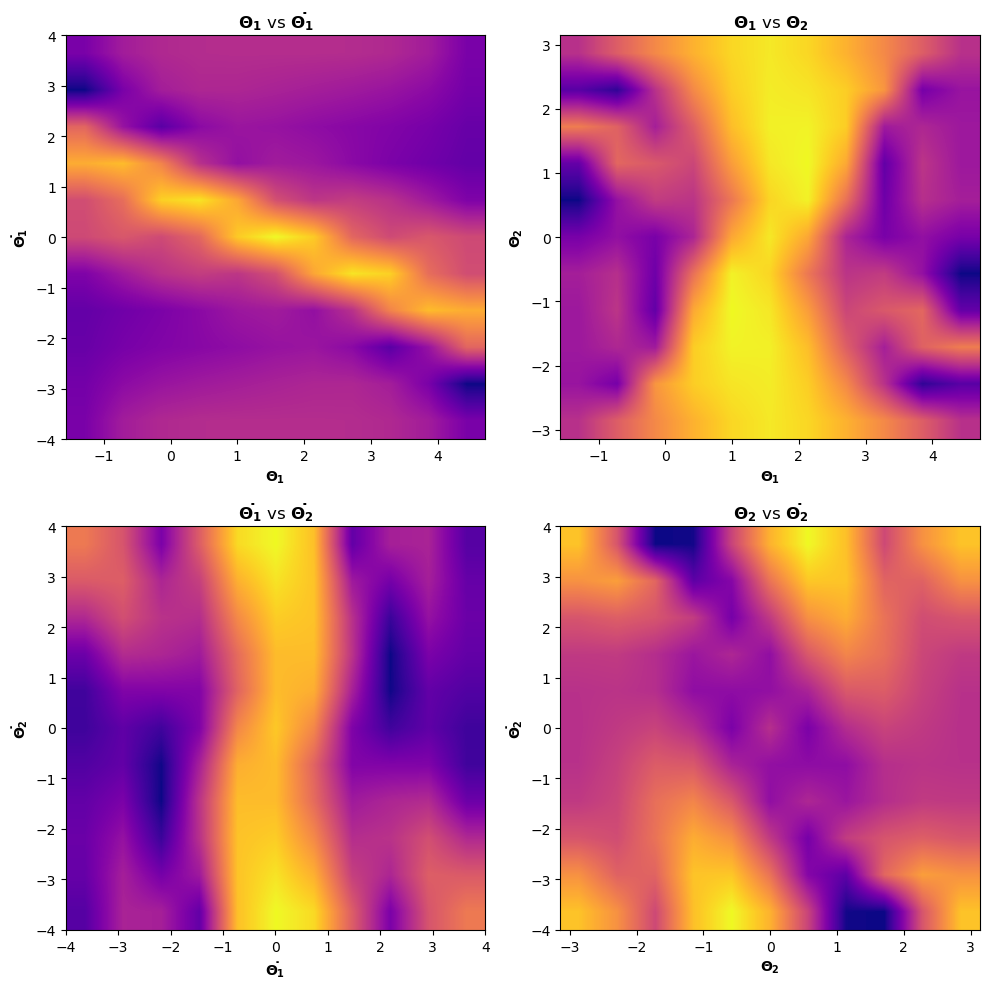

In [7]:
zs1 = np.load('/home/phu/Downloads/precal_dp_26.npy')
X_reshaped = np.load('/home/phu/Downloads/precal_dp_points_26.npy')
tjt=np.load("/home/phu/Downloads/double_pendulum_trajectory.npy")
# l1 = zs[:,0].reshape(21, 21, 21, 21)
# l1[10][10][15][10] = 100

# zs_sum_pos = []
# for i in zs:
#     zs_sum_pos.append(sum(i[i>0]))
# zs = np.array(zs_sum_pos)
zs = zs1[:,0]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
l1 = zs.reshape(11, 11, 11, 11)[5,5,:,:]
ax1.imshow(np.flip(l1,1),extent=[-np.pi/2, 3*np.pi/2,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax1.plot(tjt[0],tjt[2],linewidth=3, c='white')
ax1.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\dot{\Theta_1}}$")
ax1.set_xlabel(r"$\mathbf{\Theta_1}$")
ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
ax2 = fig.add_subplot(222)
l2 = zs.reshape(11, 11, 11, 11)[5,:,5,:]
ax2.imshow(np.flip(l2,1),extent=[-np.pi/2, 3*np.pi/2,-np.pi,np.pi],cmap='plasma',aspect='auto',interpolation="bilinear")
ax2.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\Theta_2}$")
ax2.set_xlabel(r"$\mathbf{\Theta_1}$")
ax2.set_ylabel(r"$\mathbf{\Theta_2}$")
ax3 = fig.add_subplot(223)
l3 = zs.reshape(11, 11, 11, 11)[:,5,5,:]
ax3.imshow(np.flip(l3,1),extent=[-4, 4,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
ax3.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs $\mathbf{\dot{\Theta_2}}$")
ax3.set_xlabel(r"$\mathbf{\dot{\Theta_1}}$")
ax3.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
ax4 = fig.add_subplot(224)
l4 = zs.reshape(11, 11, 11, 11)[:,:,5,5]
ax4.imshow(np.flip(l4,1),extent=[-np.pi, np.pi,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax4.plot(tjt[1],tjt[3],linewidth=3, c='white')
ax4.set_title(r"$\mathbf{\Theta_2}$ vs $\mathbf{\dot{\Theta_2}}$")
ax4.set_xlabel(r"$\mathbf{\Theta_2}$")
ax4.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
fig.tight_layout()

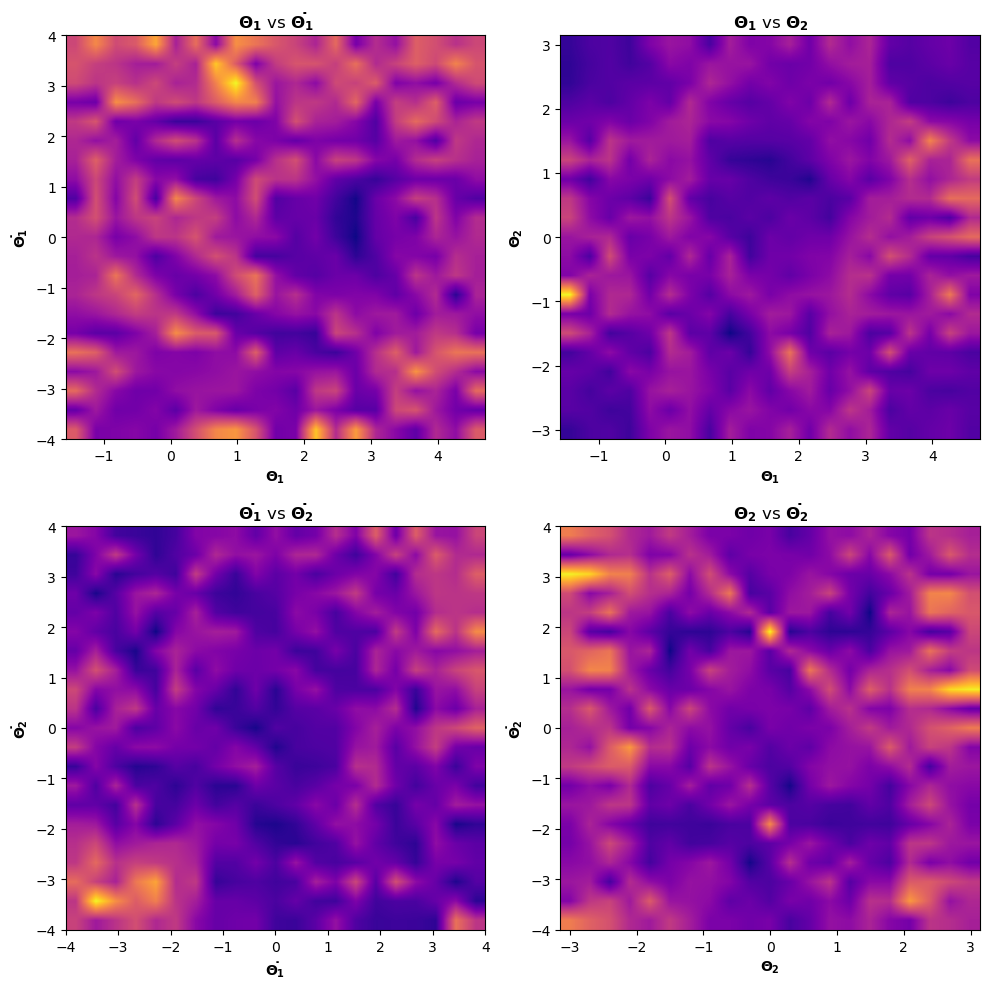

In [30]:
zs = np.load('/home/phu/Downloads/precal_dp_16.npy')
X_reshaped = np.load('/home/phu/Downloads/precal_dp_points_16.npy')
tjt=np.load("/home/phu/Downloads/double_pendulum_trajectory.npy")
# l1 = zs[:,0].reshape(21, 21, 21, 21)
# l1[10][10][15][10] = 100

# zs_sum_pos = []
# for i in zs:
#     zs_sum_pos.append(sum(i[i>0]))
# zs = np.array(zs_sum_pos)
zs = zs[:,0]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
l1 = zs.reshape(21, 21, 21, 21)[...,10,10]
ax1.imshow(np.flip(l1,1),extent=[-np.pi/2, 3*np.pi/2,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax1.plot(tjt[0],tjt[2],linewidth=3, c='white')
ax1.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\dot{\Theta_1}}$")
ax1.set_xlabel(r"$\mathbf{\Theta_1}$")
ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
ax2 = fig.add_subplot(222)
l2 = zs.reshape(21, 21, 21, 21)[10,:,10,:]
ax2.imshow(np.flip(l2,1),extent=[-np.pi/2, 3*np.pi/2,-np.pi,np.pi],cmap='plasma',aspect='auto',interpolation="bilinear")
ax2.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\Theta_2}$")
ax2.set_xlabel(r"$\mathbf{\Theta_1}$")
ax2.set_ylabel(r"$\mathbf{\Theta_2}$")
ax3 = fig.add_subplot(223)
l3 = zs.reshape(21, 21, 21, 21)[:,10,10,:]
ax3.imshow(np.flip(l3,1),extent=[-4, 4,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
ax3.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs $\mathbf{\dot{\Theta_2}}$")
ax3.set_xlabel(r"$\mathbf{\dot{\Theta_1}}$")
ax3.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
ax4 = fig.add_subplot(224)
l4 = zs.reshape(21, 21, 21, 21)[10,10,...]
ax4.imshow(np.flip(l4,1),extent=[-np.pi, np.pi,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax4.plot(tjt[1],tjt[3],linewidth=3, c='white')
ax4.set_title(r"$\mathbf{\Theta_2}$ vs $\mathbf{\dot{\Theta_2}}$")
ax4.set_xlabel(r"$\mathbf{\Theta_2}$")
ax4.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
fig.tight_layout()

In [ ]:
zs.reshape(11, 11, 11, 11)[5,5,5,5]

In [14]:
zs.reshape(11, 11, 11, 11)[5,5,5,5]

4.912523

In [12]:
for i in range(len(X_reshaped)):
    if (i == np.array([1.57079633, 0        , 0        , 0        ])).all():
        print(i)

In [21]:
for i in range(len(zs == 4.912523)):
#     print(zs[i])
    if (zs == 4.912523)[i] == True:
        print (i)

7320


In [23]:
for i in range(len(zs)):
    if zs[i] > 4.912523:
        print (X_reshaped[i])

[ 0.31415927  4.         -3.14159265 -4.        ]
[ 0.9424778   1.6        -3.14159265 -4.        ]
[ 0.9424778   2.4        -3.14159265 -4.        ]
[ 1.57079633  0.         -3.14159265 -4.        ]
[ 1.57079633  0.8        -3.14159265 -4.        ]
[ 0.9424778   2.4        -2.51327412 -4.        ]
[ 0.9424778   3.2        -2.51327412 -4.        ]
[ 1.57079633  0.         -2.51327412 -4.        ]
[ 1.57079633  0.8        -2.51327412 -4.        ]
[ 2.19911486 -1.6        -2.51327412 -4.        ]
[ 0.9424778   2.4        -1.88495559 -4.        ]
[ 0.9424778   3.2        -1.88495559 -4.        ]
[ 1.57079633 -1.6        -1.88495559 -4.        ]
[ 1.57079633  0.         -1.88495559 -4.        ]
[ 1.57079633  0.8        -1.88495559 -4.        ]
[ 1.57079633  1.6        -1.88495559 -4.        ]
[ 2.19911486 -3.2        -1.88495559 -4.        ]
[ 2.19911486 -2.4        -1.88495559 -4.        ]
[ 2.19911486 -0.8        -1.88495559 -4.        ]
[ 2.82743339 -4.         -1.88495559 -4.        ]


In [22]:
X_reshaped[7320]

array([1.57079633, 0.        , 0.        , 0.        ])

In [27]:
X_reshaped[np.argmax(zs)]

array([1.57079633, 0.        , 0.        , 0.        ])

In [ ]:
X_reshaped[np.argmax(zs)]

In [264]:
5.0945077*500

2547.25385

In [569]:
test = np.zeros([21,21,21,21])

In [570]:
test[10][10][10][10] = 1

In [573]:
test = np.zeros([21,21,21,21])
test[10][10][10][10] = 1
precal_le_ = test.T.reshape(test.T.shape[0]*test.T.shape[1]*test.T.shape[2]*test.T.shape[3])

In [580]:
l2x = np.linspace(-np.pi ,  np.pi, 21)
l2y = np.linspace(-4 ,  4, 21)
l1x = np.linspace(-np.pi/2, 3*np.pi/2, 21)
l1y = np.linspace(-4 ,  4,21)
X = np.array(np.meshgrid(l1x,l1y,l2x,l2y))

In [586]:
X.T[10][10][10][10]

array([1.57079633, 0.        , 0.        , 0.        ])

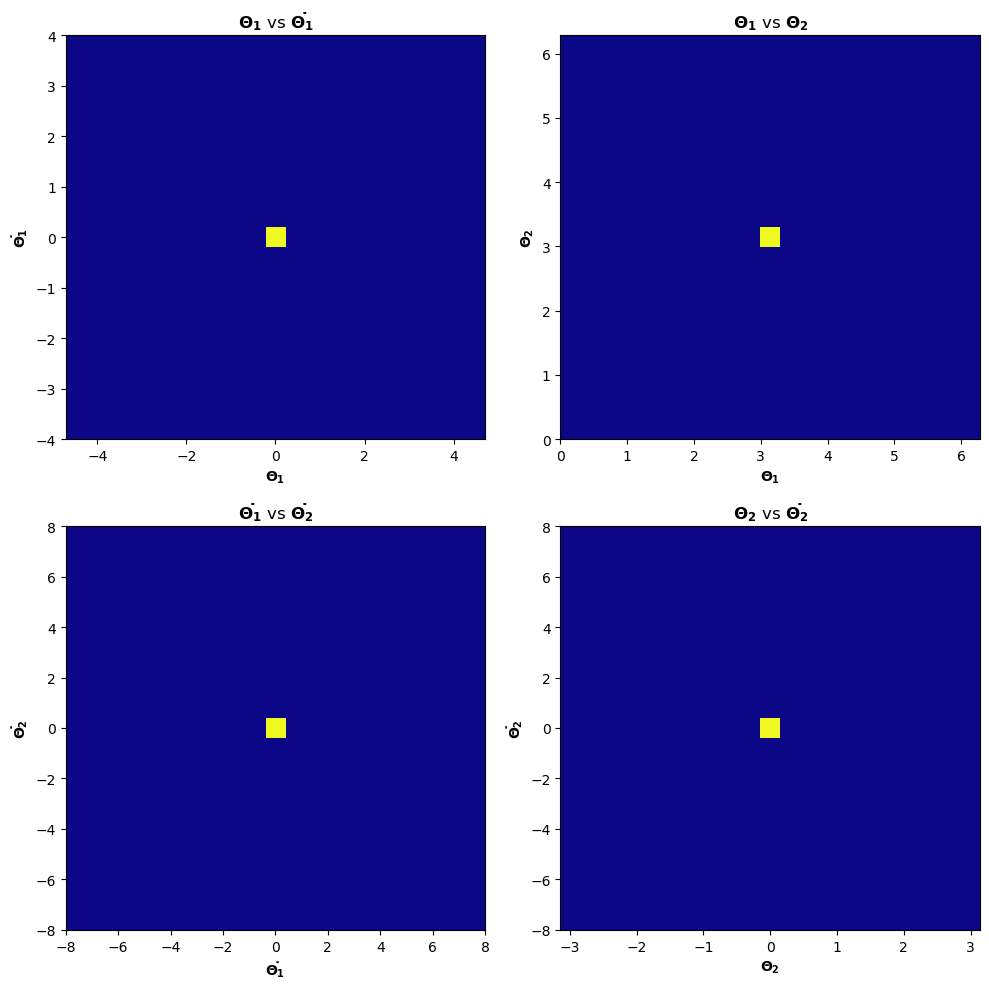

In [571]:

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
l1 = test[10,10,:,:]
ax1.imshow(l1,extent=[-3*np.pi/2, 3*np.pi/2,-4,4],cmap='plasma',aspect='auto',interpolation=None)
ax1.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\dot{\Theta_1}}$")
ax1.set_xlabel(r"$\mathbf{\Theta_1}$")
ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
ax2 = fig.add_subplot(222)
l2 = test[10,:,10,:]
ax2.imshow(l2,extent=[0, 2*np.pi,0,2*np.pi],cmap='plasma',aspect='auto',interpolation=None)
ax2.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\Theta_2}$")
ax2.set_xlabel(r"$\mathbf{\Theta_1}$")
ax2.set_ylabel(r"$\mathbf{\Theta_2}$")
ax3 = fig.add_subplot(223)
l3 = test[:,10,10,:]
ax3.imshow(np.flip(l3,1),extent=[-8, 8,-8,8],cmap='plasma',aspect='auto',interpolation=None)
ax3.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs $\mathbf{\dot{\Theta_2}}$")
ax3.set_xlabel(r"$\mathbf{\dot{\Theta_1}}$")
ax3.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
ax4 = fig.add_subplot(224)
l4 = test[:,:,10,10]
ax4.imshow(np.flip(l4,1),extent=[-np.pi, np.pi,-8,8],cmap='plasma',aspect='auto',interpolation=None)
ax4.set_title(r"$\mathbf{\Theta_2}$ vs $\mathbf{\dot{\Theta_2}}$")
ax4.set_xlabel(r"$\mathbf{\Theta_2}$")
ax4.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
fig.tight_layout()

In [567]:
l2x = np.linspace(-np.pi ,  np.pi, 11)

l2y = np.linspace(-4 ,  4, 11)
l1x = np.linspace(-np.pi/2, 3*np.pi/2, 11)
l1y = np.linspace(-4 ,  4,11)
X = np.array(np.meshgrid(l1x,l1y,l2x,l2y))

In [563]:
np.pi/2-np.pi

-1.5707963267948966

In [566]:
l1x

array([-1.57079633, -0.9424778 , -0.31415927,  0.31415927,  0.9424778 ,
        1.57079633,  2.19911486,  2.82743339,  3.45575192,  4.08407045,
        4.71238898])

In [403]:
np.linspace(0 ,  2*np.pi, 21)[5]

1.5707963267948966

In [222]:
zs[:,0][97240]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [211]:
np.argmax(zs)

193472

In [213]:
zs[np.argmax(zs)]

9.741812944412231

In [457]:
4.232775*500

2116.3875000000003

In [215]:
X_reshaped[np.argmax(zs)]

array([2.82743339, 4.        , 2.51327412, 4.        ])

In [316]:
fp1

array([  9.9969991 , -66.64666066,  66.64666066])

In [460]:
zs[92725][0]+zs[92725][1]

6.4253864

In [441]:
X_reshaped[92725]

array([1.57079633, 0.        , 0.        , 0.        ])

In [577]:
for i in range(len(X_reshaped)):
    if (X_reshaped[i] == np.array([1.5707963267948966,0.,0.,0.])).all():
        print (i)

7320


In [193]:
np.where((X_reshaped == (1.5707963267948966,0.,0.,0.)).all(axis=1))

(array([97240]),)

In [214]:
lookup = zs.reshape(21, 21, 21,21)
np.where(l1 == 9.741812944412231)

(array([], dtype=int64), array([], dtype=int64))

In [216]:
lookup[10][10][10][10]

5.764186799526215

In [218]:
5.764186799526215*500

2882.0933997631073

In [341]:
dyn_rossler = {"a": 0.15, "b": 0.2, "c": 10 }
x0 = np.array([10.0, 1.0, 0.0])
v1 = np.array([1.0, 0.0, 0.0])
v2 = np.array([0.0, 1.0, 0.0])
v3 = np.array([0.0, 0.0, 1.0])

fp1 = np.array([(dyn_rossler['c'] + np.sqrt(dyn_rossler['c']**2 - 4*dyn_rossler['a']*dyn_rossler['b']))/2,
               (- dyn_rossler['c'] - np.sqrt(dyn_rossler['c']**2 - 4*dyn_rossler['a']*dyn_rossler['b']))/(2*dyn_rossler['a']),
               (dyn_rossler['c'] + np.sqrt(dyn_rossler['c']**2 - 4*dyn_rossler['a']*dyn_rossler['b']))/(2*dyn_rossler['a'])])
fp2 = np.array([(dyn_rossler['c'] - np.sqrt(dyn_rossler['c']**2 - 4*dyn_rossler['a']*dyn_rossler['b']))/2,
               (- dyn_rossler['c'] + np.sqrt(dyn_rossler['c']**2 - 4*dyn_rossler['a']*dyn_rossler['b']))/(2*dyn_rossler['a']),
               (dyn_rossler['c'] - np.sqrt(dyn_rossler['c']**2 - 4*dyn_rossler['a']*dyn_rossler['b']))/(2*dyn_rossler['a'])])
lx = np.linspace(fp1[0] -2, fp1[0] +2, 101)
ly = np.linspace(fp1[1] -2, fp1[1] +2, 101)
lz = np.linspace(fp1[2] -2, fp1[2] +2, 101)
X = np.array(np.meshgrid(lx,ly,lz))

In [343]:
X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1]*X.T.shape[2],3)

In [344]:
X_reshaped

array([[  7.9969991 , -68.64666066,  64.64666066],
       [  7.9969991 , -68.60666066,  64.64666066],
       [  7.9969991 , -68.56666066,  64.64666066],
       ...,
       [ 11.9969991 , -64.72666066,  68.64666066],
       [ 11.9969991 , -64.68666066,  68.64666066],
       [ 11.9969991 , -64.64666066,  68.64666066]])

In [351]:
l1 = zs[:,0].reshape(101, 101, 101)
np.where(l1 == 3.156283935570735)

(array([0]), array([100]), array([100]))

In [332]:
l1[0][17]

array([0.59204693, 0.58353353, 0.57414967, 0.56384636, 0.55256706,
       0.54024623, 0.52680751, 0.51216148, 0.49620276, 0.47880639,
       0.45982314, 0.43907359, 0.41634054, 0.39135949, 0.36380719,
       0.33328925, 0.29933074, 0.26138276, 0.21888309, 0.17148135,
       0.11973352, 0.06697029, 0.02291753, 0.00450852, 0.02159404,
       0.06333248, 0.11300366, 0.16135928, 0.20531948, 0.24442279,
       0.27905126, 0.30977733, 0.33715359, 0.36165716, 0.38368467,
       0.403562  , 0.42155669, 0.43788924, 0.4527425 , 0.46626911])

In [221]:
zs = np.load('/home/phu/Downloads/precal_dp_13.npy')
X_reshaped = np.load('/home/phu/Downloads/precal_dp_points_13.npy')
np.argmax(zs[:,0])

97240

In [222]:
zs[:,0][97240]

4.232775

In [203]:
X_reshaped[97240]

array([1.57079633, 0.        , 0.        , 0.        ])

In [170]:
l2x = np.linspace(0-0.5 , 0+0.5, 21)
l2y = np.linspace(0-0.5 ,  0+0.5, 21)
l1x = np.linspace(np.pi/2-0.5 ,  np.pi/2+0.5, 21)
l1y = np.linspace(0-0.5 ,  0+0.5,21)
X = np.array(np.meshgrid(l1x,l1y,l2x,l2y))


X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1]*X.T.shape[2]*X.T.shape[3],4)

In [177]:
zs

array([[ 1.0559456 ,  0.32561657,  0.15111795, -1.5576911 ],
       [ 1.0610504 ,  0.33869836,  0.13807079, -1.5623492 ],
       [ 1.0674284 ,  0.34784523,  0.12709843, -1.5663439 ],
       ...,
       [ 1.0674291 ,  0.3478456 ,  0.12709737, -1.5663449 ],
       [ 1.0610526 ,  0.33870262,  0.13806309, -1.5623484 ],
       [ 1.0559424 ,  0.32560435,  0.15113582, -1.5576937 ]],
      dtype=float32)

In [36]:
high_env_range = np.array([np.pi/2+0.1, 0+0.1, 0+0.1,0+0.1], dtype=np.float32)
low_env_range = np.array([np.pi/2-0.1, 0-0.1, 0-0.1,0-0.1], dtype=np.float32)

In [43]:
a = np.array([np.pi/2,0,0,0])

In [51]:
k = (a <= high_env_range).all() and (a >= low_env_range).all()

In [168]:
zs[:,0]

array([1.0559456, 1.0610504, 1.0674284, ..., 1.0674291, 1.0610526,
       1.0559424], dtype=float32)

In [159]:
np.linspace(0-0.5 ,  0+0.5, 21)

array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
       -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
        0.4 ,  0.45,  0.5 ])

In [162]:
X_reshaped[97240]

array([1.57079633, 0.        , 0.        , 0.        ])

In [305]:
l2x = np.linspace(0-0.5 , 0+0.5, 21)
l2y = np.linspace(0-1 ,  0+1, 21)
l1x = np.linspace(np.pi/2-0.5 ,  np.pi/2+0.5, 21)
l1y = np.linspace(0-1 ,  0+1,21)
X = np.array(np.meshgrid(l1x,l1y,l2x,l2y))

In [307]:
X.shape

(4, 21, 21, 21, 21)

In [309]:
X.T.reshape(21**4,4)

array([[ 1.07079633, -1.        , -0.5       , -1.        ],
       [ 1.07079633, -0.9       , -0.5       , -1.        ],
       [ 1.07079633, -0.8       , -0.5       , -1.        ],
       ...,
       [ 2.07079633,  0.8       ,  0.5       ,  1.        ],
       [ 2.07079633,  0.9       ,  0.5       ,  1.        ],
       [ 2.07079633,  1.        ,  0.5       ,  1.        ]])

In [310]:
zs

array([[ 0.49870735,  0.32108238, -0.52602143],
       [ 0.47301842,  0.33490866, -0.51684549],
       [ 0.44461856,  0.35133828, -0.50771463],
       ...,
       [ 0.4116932 ,  0.24576584, -0.44629955],
       [ 0.43497134,  0.24243015, -0.46454523],
       [ 0.45633107,  0.23974797, -0.481546  ]])

In [313]:
X.T[-1][-1][-1]

array([[ 2.07079633, -1.        ,  0.5       ,  1.        ],
       [ 2.07079633, -0.9       ,  0.5       ,  1.        ],
       [ 2.07079633, -0.8       ,  0.5       ,  1.        ],
       [ 2.07079633, -0.7       ,  0.5       ,  1.        ],
       [ 2.07079633, -0.6       ,  0.5       ,  1.        ],
       [ 2.07079633, -0.5       ,  0.5       ,  1.        ],
       [ 2.07079633, -0.4       ,  0.5       ,  1.        ],
       [ 2.07079633, -0.3       ,  0.5       ,  1.        ],
       [ 2.07079633, -0.2       ,  0.5       ,  1.        ],
       [ 2.07079633, -0.1       ,  0.5       ,  1.        ],
       [ 2.07079633,  0.        ,  0.5       ,  1.        ],
       [ 2.07079633,  0.1       ,  0.5       ,  1.        ],
       [ 2.07079633,  0.2       ,  0.5       ,  1.        ],
       [ 2.07079633,  0.3       ,  0.5       ,  1.        ],
       [ 2.07079633,  0.4       ,  0.5       ,  1.        ],
       [ 2.07079633,  0.5       ,  0.5       ,  1.        ],
       [ 2.07079633,  0.

In [468]:
s = np.array([-1,-1,3,4])

In [474]:
sum(s[s > 0])

7

In [475]:
np.pi-np.pi/4

2.356194490192345

In [476]:
np.pi+np.pi/4

3.9269908169872414

In [505]:
s = np.array([-4.50954838,  0.27931328, -0.37524054, -1.12955847])

In [506]:
low_env_range = np.array([np.pi-np.pi/4,-np.pi/4,-4,-4])
high_env_range = np.array([np.pi+np.pi/4,np.pi/4,4,4])

In [507]:
bool((s >= high_env_range).any() or (s <= low_env_range).any())

True

In [494]:
(s <= low_env_range).all()

False

In [495]:
(s >= high_env_range).all()

False

In [496]:
high_env_range

array([3.92699082, 0.78539816, 4.        , 4.        ])

In [503]:
(s > high_env_range).any()

False

In [502]:
(s <= low_env_range).any()

True

In [511]:
np.cos(np.pi-np.pi/4)

-0.7071067811865475

In [513]:
-np.cos(np.pi+np.pi/4)

0.7071067811865477

In [514]:
np.cos(4)

-0.6536436208636119

In [515]:
np.cos(3)

-0.9899924966004454